# Read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
df = pd.read_csv(r"cul_cat1.csv",index_col=[0])
df.head()

,tns_name,previous_name,repeater_name,ra,dec,gb,bonsai_dm,low_ft_68,up_ft_68,low_ft_95,...,log_width_fitb,log_high_freq,log_low_freq,log_peak_freq,log_fre_width,log_redshift,log_in_duration,log_energy,log_luminosity,log_T_B
0,FRB20180725A,180725.J0613+67,non-repeater,93.42,67.07,21.29,716.6,0.0,2.7,0.0,...,-3.528708,2.880871,2.686010,2.783475,2.654057,-0.193318,-0.743748,40.451471,43.284176,29.741595
1,FRB20180727A,180727.J1311+26,non-repeater,197.72,26.42,85.60,642.1,0.0,1.9,0.0,...,-2.856985,2.903199,2.602277,2.693111,2.810184,-0.211253,-0.065109,40.075391,42.683330,29.418756
2,FRB20180729A,180729.J1316+55,non-repeater,199.40,55.58,61.16,108.4,0.0,4.6,0.0,...,-4.000000,2.840545,2.602277,2.720655,2.467101,-2.648161,-1.000975,36.029529,38.868241,26.685375
3,FRB20180729B,180729.J0558+56,non-repeater,89.93,56.50,15.68,318.6,0.0,0.9,0.0,...,-3.503070,2.903199,2.645226,2.817896,2.617914,-0.802538,-0.566616,38.696017,41.644170,28.500531
4,FRB20180730A,180730.J0353+87,non-repeater,57.39,87.19,25.11,849.2,3.3,2.3,6.1,...,-3.329754,2.880356,2.602277,2.684396,2.810947,-0.095607,-0.585606,41.368382,43.908874,30.178429


# choose data

In [2]:
col=[
    'peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B'
]
cd = df[col]
#scaler = StandardScaler()
scale = cd#scaler.fit_transform(cd)
cf_scale = pd.DataFrame(scale, columns = col)
cf_scale.head()

,peak_freq,log_bc_width,log_flux,log_fluence,redshift,fre_width,log_in_duration,log_energy,log_luminosity,log_T_B
0,607.4,0.469822,0.230449,0.612784,0.640740,450.875425,-0.743748,40.451471,43.284176,29.741595
1,493.3,0.469822,-0.236572,0.363612,0.614818,645.927163,-0.065109,40.075391,42.683330,29.418756
2,525.6,-0.008774,1.068186,1.230449,0.002248,293.157605,-1.000975,36.029529,38.868241,26.685375
3,657.5,0.294466,-0.036212,0.079181,0.157566,414.871625,-0.566616,38.696017,41.644170,28.500531
4,483.5,0.691965,0.716003,1.431364,0.802405,647.063272,-0.585606,41.368382,43.908874,30.178429


# t-SNE(t-distributed Stochastic Neighbor Embedding)

In [3]:
""" p=12
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
for i in range(0,200):
    for j in [12]:
        sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.8*p)})
        per=i#5 6 7 8 9
        rs=j
        pca = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=per,n_iter=3000,random_state=rs)
        principalComponents = pca.fit_transform(cf_scale.values)
        pca_cf = pd.DataFrame(data = principalComponents, columns = ['x','y'])
        plt.scatter(pca_cf['x'].values,
                    pca_cf['y'].values,
                    c=[sns.color_palette()[x] for x in df.repeater_name.map({"non-repeater":0, "repeater":1})],
                    s=[y for y in df.repeater_name.map({"non-repeater":10, "repeater":100})])
        title='perplexity_'+str(i)+' random_'+str(j)
        plt.title('t-SNE'+title)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.savefig('./TSNE_per/'+title+'.png')
        plt.cla() """

' p=12\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.manifold import TSNE\nfor i in range(0,200):\n    for j in [12]:\n        sns.set(context=\'notebook\', style=\'white\', rc={\'figure.figsize\':(p,0.8*p)})\n        per=i#5 6 7 8 9\n        rs=j\n        pca = TSNE(n_components=2, learning_rate=\'auto\',init=\'random\',perplexity=per,n_iter=3000,random_state=rs)\n        principalComponents = pca.fit_transform(cf_scale.values)\n        pca_cf = pd.DataFrame(data = principalComponents, columns = [\'x\',\'y\'])\n        plt.scatter(pca_cf[\'x\'].values,\n                    pca_cf[\'y\'].values,\n                    c=[sns.color_palette()[x] for x in df.repeater_name.map({"non-repeater":0, "repeater":1})],\n                    s=[y for y in df.repeater_name.map({"non-repeater":10, "repeater":100})])\n        title=\'perplexity_\'+str(i)+\' random_\'+str(j)\n        plt.title(\'t-SNE\'+title)\n        plt.xlabel(\'X\')\n        plt.ylabel(\'Y\')\n        plt.savefig(\'

In [4]:
from sklearn.manifold import TSNE
per=int(np.sqrt(cf_scale.shape[0]))
tsne = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=per,n_iter=1000,random_state=45)
pca_cf = pd.DataFrame(data = tsne.fit_transform(cf_scale.values), columns = ['x','y'])
pca_cf['repeater']=df['repeater_name'].copy()
print(per)

24


/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_4380/767002317.py:7: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7fc300a96280> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)


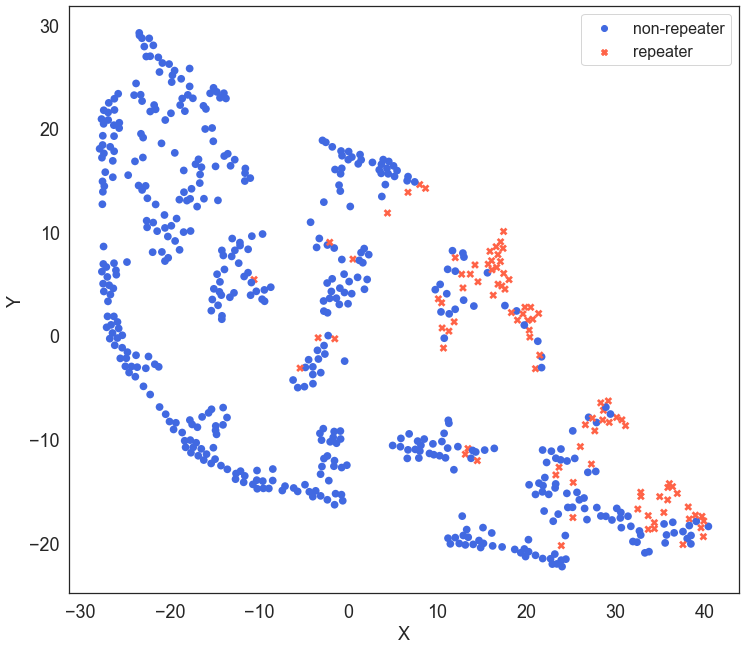

In [5]:
p=12
fs=18
s=5*p
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue='repeater',style='repeater',data=pca_cf,linewidth=0,palette=color,s=s)
plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)
#plt.title('t-SNE',fontsize=18)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'./fig/TSNE.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

For FAST observation

In [6]:
""" p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
obs=pca_cf.copy()
#obs['repeater']=df['repeater_name']
list=["FRB20180928A","FRB20181030E","FRB20181220A","FRB20190109B","FRB20190412B","FRB20190423B","FRB20190625A","FRB20181231B","FRB20190527A"]
for l in list:
    obs.loc[np.ravel(np.where(df.loc[:,'tns_name']==l)),'repeater']=l
color_obs=['navy','red','lightsalmon','gold','lawngreen','pink','turquoise','aqua','indigo','cornflowerblue','violet']
sns.scatterplot(x='x',y='y',data=obs,hue='repeater',
                palette=color_obs,s=20+80*((obs.loc[:,'repeater']!='repeater')&(obs.loc[:,'repeater']!='non-repeater')),
                edgecolor='black',linewidth=0.5)
plt.title('t-SNE',fontsize=18)
plt.xlabel(None,fontsize=18)
plt.ylabel(None,fontsize=18) """

' p=12\nsns.set(context=\'notebook\', style=\'white\', rc={\'figure.figsize\':(p,0.9*p)})\nobs=pca_cf.copy()\n#obs[\'repeater\']=df[\'repeater_name\']\nlist=["FRB20180928A","FRB20181030E","FRB20181220A","FRB20190109B","FRB20190412B","FRB20190423B","FRB20190625A","FRB20181231B","FRB20190527A"]\nfor l in list:\n    obs.loc[np.ravel(np.where(df.loc[:,\'tns_name\']==l)),\'repeater\']=l\ncolor_obs=[\'navy\',\'red\',\'lightsalmon\',\'gold\',\'lawngreen\',\'pink\',\'turquoise\',\'aqua\',\'indigo\',\'cornflowerblue\',\'violet\']\nsns.scatterplot(x=\'x\',y=\'y\',data=obs,hue=\'repeater\',\n                palette=color_obs,s=20+80*((obs.loc[:,\'repeater\']!=\'repeater\')&(obs.loc[:,\'repeater\']!=\'non-repeater\')),\n                edgecolor=\'black\',linewidth=0.5)\nplt.title(\'t-SNE\',fontsize=18)\nplt.xlabel(None,fontsize=18)\nplt.ylabel(None,fontsize=18) '

# HDBSCAN(Hierarchical Density-Based Spatial Clustering of Applications with Noise)

In [15]:
import hdbscan
import unml
labels = hdbscan.HDBSCAN(#20 10
    min_cluster_size=32,
    min_samples=2,
    #cluster_selection_epsilon=0
).fit_predict(pca_cf.loc[:,['x','y']])
#labels=unml.noise_points_cl(labels_list=labels,embedding=principalComponents)
print(np.max(labels))

""" p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.8*p)})
fig,ax=plt.subplots()
clustered = (labels >= 0)
scatn=ax.scatter(pca_cf.loc[~clustered,'x'],pca_cf.loc[~clustered,'y'],color=(0.5, 0.5, 0.5),alpha=0.5,s=100)#灰色
scat1=ax.scatter(pca_cf.loc[clustered,'x'],pca_cf.loc[clustered,'y'],c=labels[clustered],cmap='Paired',s=10)
plt.show()  """

6


" p=12\nsns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.8*p)})\nfig,ax=plt.subplots()\nclustered = (labels >= 0)\nscatn=ax.scatter(pca_cf.loc[~clustered,'x'],pca_cf.loc[~clustered,'y'],color=(0.5, 0.5, 0.5),alpha=0.5,s=100)#灰色\nscat1=ax.scatter(pca_cf.loc[clustered,'x'],pca_cf.loc[clustered,'y'],c=labels[clustered],cmap='Paired',s=10)\nplt.show()  "

In [8]:
import unml
TSNE_HD=pca_cf.loc[:,['x','y']]
TSNE_HD['labels']=labels
n_labels,nrp_lb,oth_lb,rp_lb=unml.ML_label(labels=TSNE_HD['labels'],observe=df['repeater_name'],threshold=0.2,test=True)
print([nrp_lb,oth_lb,rp_lb])

0         0.0
1         0.0
2    0.029412
3     0.09375
4    0.103448
5    0.294118
6     0.66129
Name: rp_ratio, dtype: object
[array([0, 1]), array([2, 3, 4]), array([5, 6])]


/Volumes/Macintosh HD - Data/Research/summer project/FRB_ML_unsp/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]


/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_4380/3823553252.py:13: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7fc311f47bb0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(labels=lg,


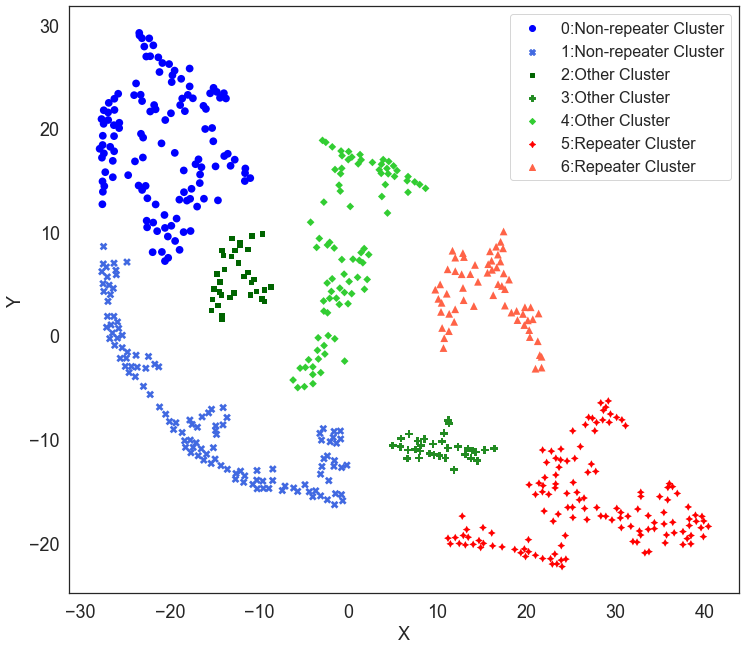

In [9]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})

TSNE_HD['labels']=n_labels
color=['blue','royalblue',#'cornflowerblue',#'lightskyblue',
       'darkgreen','forestgreen','limegreen',#'palegreen',
       'red','tomato'#,'lightsalmon'
       ]
sns.scatterplot(x='x',y='y',hue = 'labels',data=TSNE_HD,legend='full',linewidth=0,palette=color,style='labels',s=s)#'viridis_r'
lg=(['_']+[str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])
#plt.legend(loc='best',ncol=2)
plt.legend(labels=lg,
           loc='best',fontsize=fs-2)
plt.tick_params(labelsize=fs)
#plt.title('t-SNE with HDBSCAN',fontsize=fs)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'./fig/TSNE_HD.png',bbox_inches='tight',dpi=100,pad_inches=0.1)

In [10]:
pca_cf['HDBSCAN_c']=n_labels
pca_cf['HDBSCAN']=np.zeros(len(n_labels))
for i in range(len(pca_cf['HDBSCAN_c'].values)):
    if (pca_cf.loc[i,'HDBSCAN_c'] in rp_lb):
        pca_cf.loc[i,'HDBSCAN']=1#repeater
    elif(pca_cf.loc[i,'HDBSCAN_c'] in nrp_lb):
        pca_cf.loc[i,'HDBSCAN']=-1#non-repeater
pca_cf.head()

,x,y,repeater,HDBSCAN_c,HDBSCAN
0,-0.448038,5.904637,non-repeater,4,0.0
1,-19.832630,10.575487,non-repeater,0,-1.0
2,11.311349,-8.488964,non-repeater,3,0.0
3,2.315777,7.788385,non-repeater,4,0.0
4,-20.548374,10.368378,non-repeater,0,-1.0


# Mutual Information

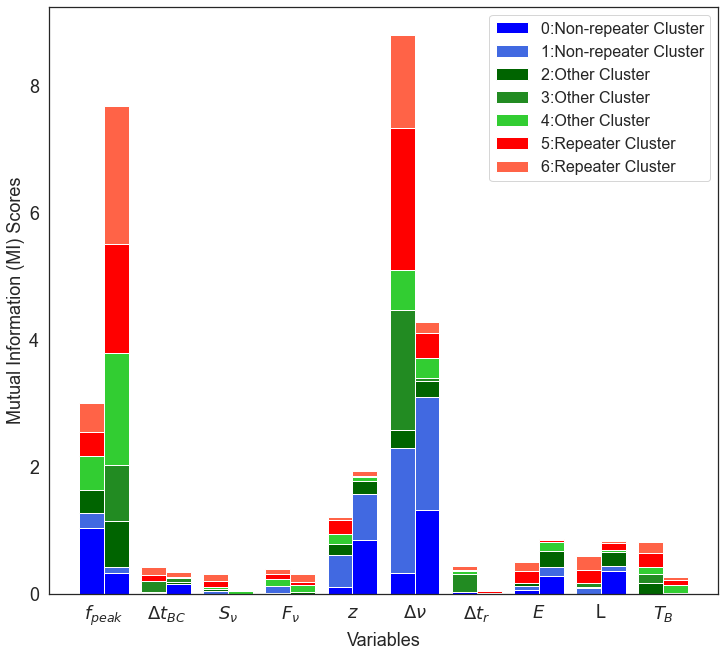

In [11]:
from unml import get_mi_score

p=12
colx=[r'$f_{peak}$',r'$\Delta t_{BC}$',r'$S_{\nu} $',r'$F_{\nu} $',r'$z$',r'$\Delta \nu$',r'$\Delta t_r$',r'$E$',r'L',r'$T_B$']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(col))
fig,ax=plt.subplots()

lgf=([str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])

for i in range(np.min(n_labels),np.max(n_labels)+1):
    mi_score=get_mi_score(cf_scale,label=i,embedding=pca_cf[['x','y']],labels_list=n_labels,axis='x')
    if(i==np.min(n_labels)):
        rects1=ax.bar(x-width/2,mi_score['x'],width,label='label'+str(i),color=color[i])
        bt=mi_score['x']
    else:
        rects1=ax.bar(x-width/2,mi_score['x'],width,label='label'+str(i),color=color[i],bottom=bt)
        bt=bt+mi_score['x'].values

for i in range(np.min(n_labels),np.max(n_labels)+1):
    mi_score=get_mi_score(cf_scale,label=i,embedding=pca_cf[['x','y']],labels_list=n_labels,axis='y')
    if(i==np.min(n_labels)):
        rects2=ax.bar(x+width/2,mi_score['y'],width,label='label'+str(i),color=color[i])
        bt=mi_score['y']
    else:
        rects2=ax.bar(x+width/2,mi_score['y'],width,label='label'+str(i),color=color[i],bottom=bt)
        bt=bt+mi_score['y'].values

ax.legend(lgf,loc='best',fontsize=fs-2)
plt.tick_params(labelsize=fs)
#ax.set_title('Features Correlation in t-SNE',fontsize=fs)
ax.set_xlabel('Variables',fontsize=fs)
ax.set_ylabel('Mutual Information (MI) Scores',fontsize=fs)
#ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(colx)
#legend('Principal Component 1',fontsize=18)
plt.savefig(f'./fig/TSNE_feature.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

# analysis

In [12]:
col=['peak_freq','log_bc_width','log_flux', 'log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B']
colx=['Peak Frequency','Boxcar Width','Flux','Fluence','Redshift','Frequency Width','Rest-frame Width','Energy','Luminosity','Brightness Temperature']
dfpl=df.loc[:,col]
dfpl['label']=n_labels
''' for i in range(len(dfpl['label'])):
    if(dfpl.loc[i,'label'] in rp_lb):
        dfpl.loc[i,'label']='repeater cluster'
    elif(dfpl.loc[i,'label'] in nrp_lb):
        dfpl.loc[i,'label']='non-repeater cluster'
    elif(dfpl.loc[i,'label'] in oth_lb):
        dfpl.loc[i,'label']='other cluster' '''
dfpl.head()

,peak_freq,log_bc_width,log_flux,log_fluence,redshift,fre_width,log_in_duration,log_energy,log_luminosity,log_T_B,label
0,607.4,0.469822,0.230449,0.612784,0.640740,450.875425,-0.743748,40.451471,43.284176,29.741595,4
1,493.3,0.469822,-0.236572,0.363612,0.614818,645.927163,-0.065109,40.075391,42.683330,29.418756,0
2,525.6,-0.008774,1.068186,1.230449,0.002248,293.157605,-1.000975,36.029529,38.868241,26.685375,3
3,657.5,0.294466,-0.036212,0.079181,0.157566,414.871625,-0.566616,38.696017,41.644170,28.500531,4
4,483.5,0.691965,0.716003,1.431364,0.802405,647.063272,-0.585606,41.368382,43.908874,30.178429,0


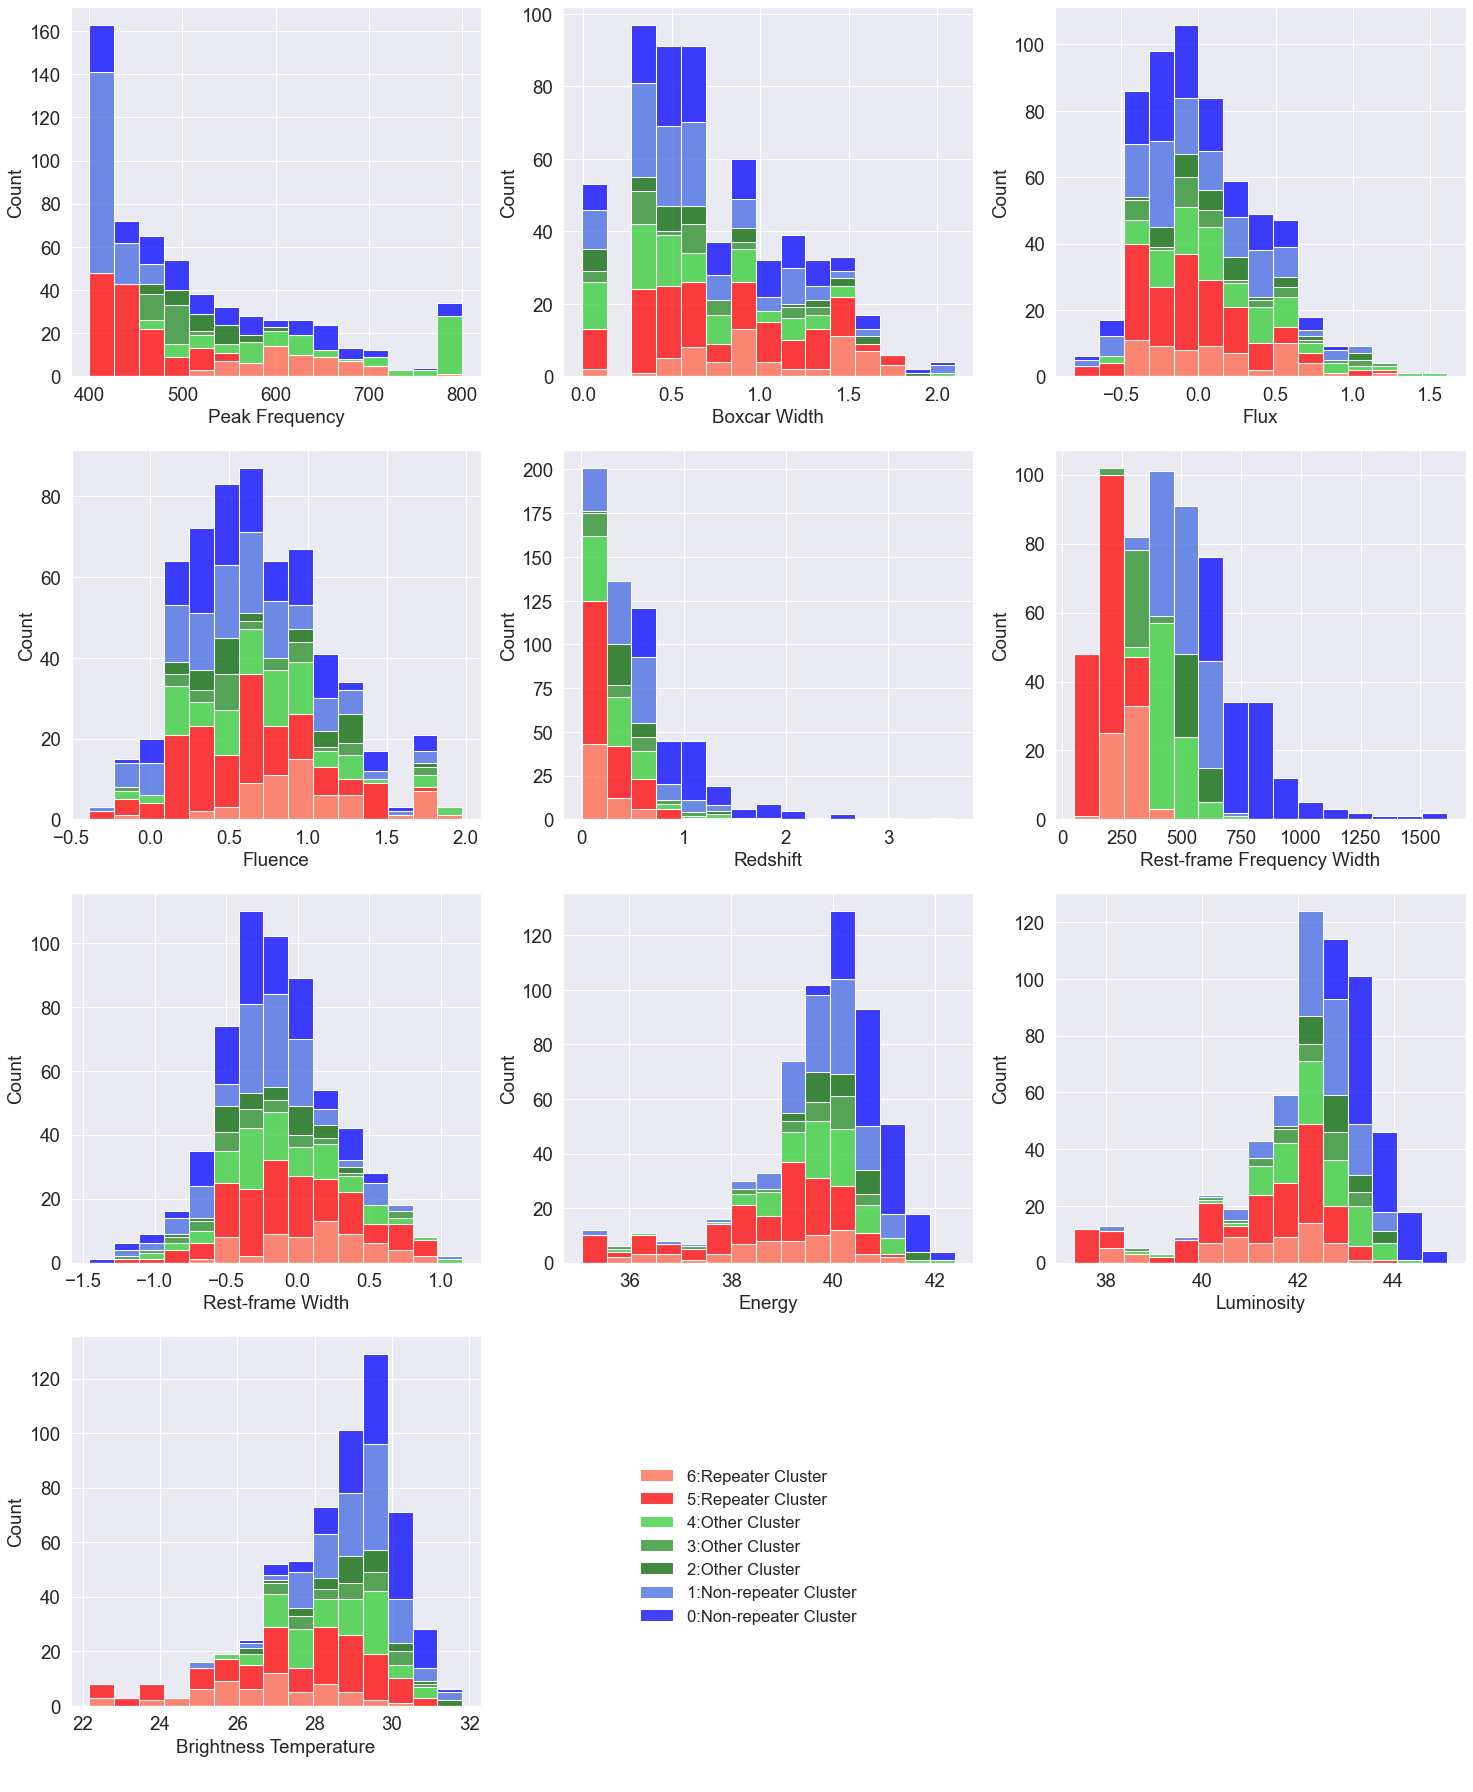

In [13]:
plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')
p=24
figure = plt.figure(figsize=(p,1.25*p))
colx=['Peak Frequency','Boxcar Width','Flux','Fluence','Redshift','Rest-frame Frequency Width','Rest-frame Width','Energy','Luminosity','Brightness Temperature']
for i in range(len(col)):
    ax=plt.subplot(int((len(col)-1)/3)+1,3,i+1)
    sns.histplot(data=dfpl,x=col[i],hue='label',bins=15,
                 palette=color,#'deep',#viridis',
                 legend=None,
                 multiple='stack',
                 #element="step"
                 )
    plt.xlabel(colx[i],fontsize=fs)
    plt.ylabel('Count',fontsize=fs)
    plt.tick_params(labelsize=fs)
#plt.subplot(int((len(col)-1)/4)+1,4,len(col)+1)

lg=([str(i)+':Non-repeater Cluster' for i in nrp_lb]+[str(i)+':Other Cluster' for i in oth_lb]+[str(i)+':Repeater Cluster' for i in rp_lb])
#hds, lbs = ax.get_legend_handles_labels()
figure.legend(lg[::-1],loc=[0.43,0.09],frameon=False,shadow=False,fontsize=fs-2)
plt.savefig('./fig/parameter_label.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

In [14]:
tf=df.loc[dfpl.loc[:,'label']==5,['peak_freq','fre_width_ob']]
tf.head()

,peak_freq,fre_width_ob
9,400.2,186.2
12,464.2,118.1
21,400.2,136.1
26,400.2,199.7
28,400.2,127.2


### UMAP in t-SNE

In [15]:
r1=pd.read_csv(r'UMAP_labels.csv')
r1['x']=pca_cf['x'].values
r1['y']=pca_cf['y'].values
r1.head()

,repeater,UMAP_HDBSCAN,x,y
0,non-repeater,3,-0.448038,5.904637
1,non-repeater,1,-19.832630,10.575487
2,non-repeater,4,11.311349,-8.488964
3,non-repeater,3,2.315777,7.788385
4,non-repeater,1,-20.548374,10.368378


/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_2298/804108263.py:9: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7ff4f0de6dc0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(labels=['_','0:Non-repeater Cluster','1:Non-repeater Cluster','2:Other Cluster','3:Other Cluster','4:Other Cluster','5:Repeater Cluster','6:Repeater Cluster'],loc='best',fontsize=fs-2)


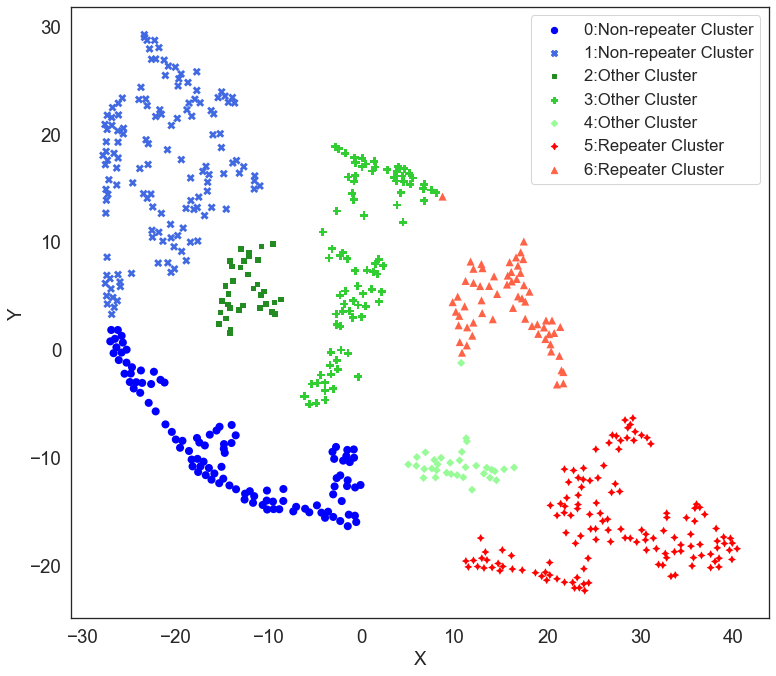

In [16]:
p=12
UMAP_color=['blue','royalblue',#'cornflowerblue','lightskyblue',
       'forestgreen','limegreen','palegreen',
       'red','tomato'#,'lightsalmon'
       ]
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
sns.scatterplot(x='x',y='y',hue = 'UMAP_HDBSCAN',data=r1,legend='full',linewidth=0,palette=UMAP_color,style='UMAP_HDBSCAN',s=s)
#plt.title('UMAP with HDBSCAN in t-SNE space', fontsize=18)
plt.legend(labels=['_','0:Non-repeater Cluster','1:Non-repeater Cluster','2:Other Cluster','3:Other Cluster','4:Other Cluster','5:Repeater Cluster','6:Repeater Cluster'],loc='best',fontsize=fs-2)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'./fig/UMAP_HDBSCAN_TSNE.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

## only HDBSCAN

In [17]:
frb=pd.concat([df[['tns_name','repeater_name']],pca_cf[['HDBSCAN']]],axis=1)
frb.columns=['tns_name','repeater','T-SNE_HDBSCAN']
frb.head()

,tns_name,repeater,T-SNE_HDBSCAN
0,FRB20180725A,non-repeater,0.0
1,FRB20180727A,non-repeater,-1.0
2,FRB20180729A,non-repeater,0.0
3,FRB20180729B,non-repeater,0.0
4,FRB20180730A,non-repeater,-1.0


## Save

In [18]:
frb.to_csv(r't-SNE_result.csv',index=False)